# Coal production in mines 2013
by: Angel Ysla

Abstract: We did analysis and determined ___.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set();

## cleaned data
We cleaned this data in: deliver/ Data_Cleaning.ipynb

In [13]:
df = pd.read_csv ("../data/cleaned_coalpublic2013.csv", header=0, index_col="MSHA ID")
df[['Year', 'Mine_Name']].head()

,Year,Mine_Name
MSHA ID,,
103381,2013,Tacoa Highwall Miner
103404,2013,Reid School Mine
100759,2013,North River #1 Underground Min
103246,2013,Bear Creek
103451,2013,Knight Mine


# predict the log of coal mines
3.10 Random Forest Prediction and Evaluation

In [41]:
features = [
    'Average_Employees',
    'Labor_Hours'
    ]

# turn categoricals into numbers for scikit learn
categoricals = [
    'Mine_State',
    'Mine_County',
    'Mine_Status',
    'Mine_Type',
    'Company_Type',
    'Operation_Type',
    'Operating_Company',
    'Union_Code',
    'Coal_Supply_Region',
    ]
#control { or } tabs in and out

target = 'log_production'

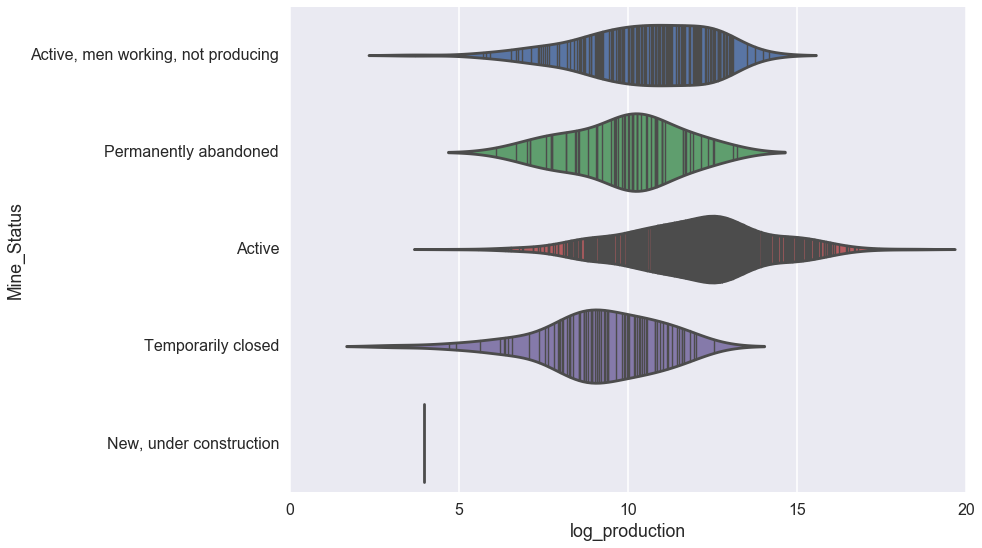

In [33]:
#seaborn violin plot function
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Mine_Status", x="log_production", data = df,
              split=True, inner="stick",)
plt.tight_layout()

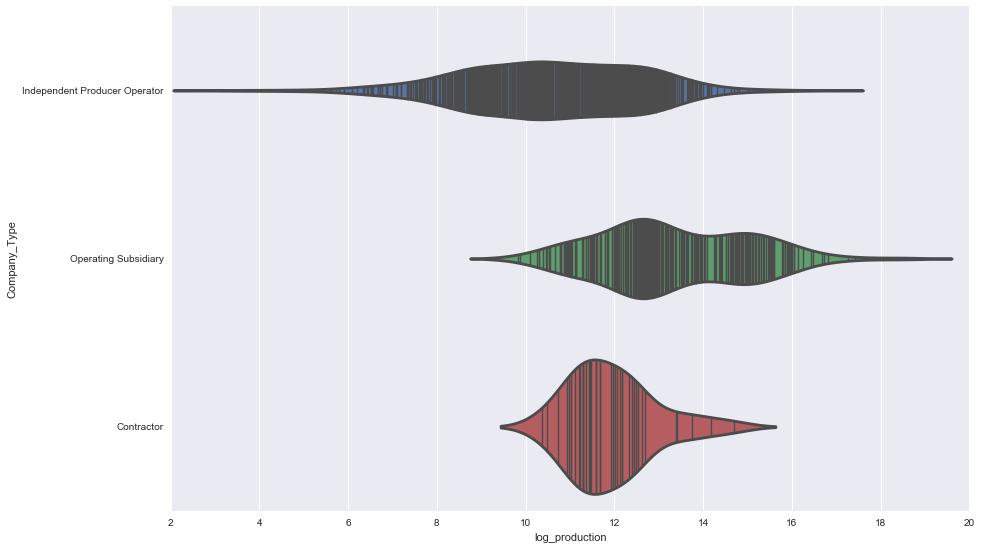

In [14]:
#seaborn violin plot function
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Company_Type", x="log_production", data = df,
              split=True, inner="stick",)
plt.tight_layout()
plt.savefig("../figures/Coal_prediction_Company_type_vs_log_production.png")

In [47]:
#get each into dummy variables 
dummy_categoricals = []
for categorical in categoricals:
    print categorical, len(df[categorical].unique())
    # Avoid the dummy variable trap!
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical], prefix=categorical)
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

Mine_State 29
Mine_County 164
Mine_Status 5
Mine_Type 3
Company_Type 3
Operation_Type 2
Operating_Company 752
Union_Code 7
Coal_Supply_Region 8


dummy_categoricals[:10]

# Random Forest Regressor

In [50]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
# leaving imports in the middle, generally bad practice, 
# but leaving it there so I can see what libraries are necessary for this section

In [ ]:
len(dummy_categorials)

In [17]:
train, test = train_test_split(df, test_size=0.3)

NameError: name 'train_test_split' is not defined

In [60]:
rf.fit(train[features + dummy_categoricals], train[target])
#just makes a long list of features and dummy_categoricals

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

NameError: name 'test' is not defined

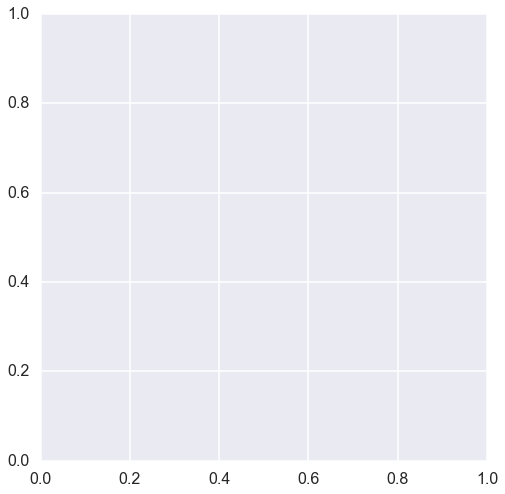

In [15]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(test[target], rf.predict(test[features + dummy_categoricals]))
plt.xlim(0,22)
plt.ylabel("Predicted production")
plt.ylim(0,22)
plt.tight_layout()
#test (log_production) vs what we predict
plt.savefig("../figures/Coal_-RF-prediction-production.png")

In [63]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

In [64]:
predicted = rf.predict(test[features + dummy_categoricals])
r2_score(test[target], predicted)

0.87536042366533762

In [65]:
explained_variance_score(test[target], predicted)

0.87540450429321837

In [66]:
mean_squared_error(test[target], predicted)

0.56559392358272587

In [70]:
rf_importances = pd.DataFrame({'name':train[features + dummy_categoricals].columns,
                              'importance':rf.feature_importances_
                              }).sort_values(by='importance',
                                            ascending=False).reset_index(drop=True)

rf_importances.head(20)
#all importances below will add up to 1
# will tell you top 20 what contributed and how much percentage

,importance,name
0,0.820329,Labor_Hours
1,0.066822,Average_Employees
2,0.011781,Coal_Supply_Region_Powder River Basin
3,0.006292,Mine_Type_Surface
4,0.004695,Operating_Company_Commonwealth Environmental Sys
5,0.002672,Coal_Supply_Region_Appalachia Central
6,0.002526,Mine_County_Campbell
7,0.002491,"Operating_Company_West Fork Coal, Llc"
8,0.002451,Mine_Status_Active
9,0.002342,Operating_Company_Circle L Land Company Inc
